## The Bavarian Game: Exercise 4
Submitted by **Mohammed Abbas Ansari, Kai Rothe**

### Task 1: Implementation of Motor Noise

#### Experiment Design

Chosen motor noise was sampled from a normal distribution:

| Type of Motor Noise | $\mu$ | $\sigma^{2}$ |
| :-: | :-: | :-: |
| Small | 1 | 2 |
| Medium | 3 | 4 |
| Large | 5 | 6 |

Since we were part of group A, feedback type was always 'endpos' and perturbation was sudden. At the end of each block, friction was reduced to simulate a lighter beer pint. The experiment block structure was:

| Attempts | Perturbation | Noise | 
| :-: | :-: | :-:| 
| 1 - 10 | False | None | 
| 11 - 40 | True | None | 
| 41 - 50 | False | None | 
| 51 - 60 | False | Small | 
| 61 - 90 | True | Small | 
| 91 - 100 | False | Small | 
| 101 - 110 | False | Medium | 
| 111 - 140 | True | Medium | 
| 141 - 150 | False | Medium | 
| 151 - 160 | False | Large | 
| 161 - 190 | True | Large | 
| 191 - 200 | False | Large | 

As part of our **task 4**, we add one more block of trials at the end without any motor noise to investigate for any after-effects.


| Attempts | Perturbation | Noise | 
| :-: | :-: | :-:| 
| 201 - 210 | False | None | 
| 211 - 240 | True | None | 
| 241 - 250 | False | None | 

#### Motor noise Implementation Code

```py
def calculate_velocity(start_pos, mouse_pos):
    global noise, cur_noise
    cur_noise = 0 if not noise else np.random.normal(noise[0], noise[1], 1).astype(float)[0]
    dx = mouse_pos[0] - start_pos[0]
    dy = mouse_pos[1] - start_pos[1]
    speed = math.sqrt(dx**2 + dy**2) / 10
    angle = math.atan2(dy, dx) + math.radians(cur_noise)
    return [speed * math.cos(angle), speed * math.sin(angle)]
```

#### Beer Pint Drinking Implementation Code

We display the message "Drinking Beer... The pint just got lighter!" at the end of each trial block to indicate that friction has changed and there might be some effect of drinking beer. The radius of yellow inside the beer is also reduced to indicate that beer in the pint has decreased.

```py

def draw_playfield(mask_pint=False):
    """Draw the game playfield."""
    screen.fill(WHITE)

    # Draw the table
    pygame.draw.rect(screen, DARK_BROWN, TABLE_RECT)

    # Draw free movement zone
    pygame.draw.circle(screen, LIGHT_BLUE, START_POS, FREE_ZONE_RADIUS)
    pygame.draw.circle(screen, BLACK, START_POS, FREE_ZONE_RADIUS, 3)

    # Draw scoring areas with precomputed gradients
    screen.blit(green_gradient, SCORING_RECT.topleft)
    screen.blit(red_gradient, SCORING_RECT.topleft)

    # Optionally mask the beer pint
    if not mask_pint:
        # Draw the beer pint with size of yellow based on fraction_beer_in_pint
        pygame.draw.circle(screen, WHITE, (int(pint_pos[0]), int(pint_pos[1])), pint_radius + 2)
        pygame.draw.circle(screen, YELLOW, (int(pint_pos[0]), int(pint_pos[1])), pint_radius*fraction_beer_in_pint)

def apply_friction():
    global pint_velocity, fraction_beer_in_pint, friction
    friction = BASE_FRICTION - (BASE_FRICTION - MAX_FRICTION) * fraction_beer_in_pint
    pint_velocity[0] *= friction
    pint_velocity[1] *= friction

def display_message(text, flash_message=False, duration=1000):
    """Display a message on the screen, flash the message with colours if specified."""
    if flash_message:
        font = pygame.font.Font(None, 52)
        screen = pygame.display.get_surface()
        text_surface = font.render(text, True, (255, 255, 255))
        text_rect = text_surface.get_rect(center=(screen.get_width() // 2, screen.get_height() // 2 - 100))
    
        colors = [DARK_RED, RED_LAMP]
        end_time = time.time() + duration / 1000
        while time.time() < end_time:
            for color in colors:
                text_surface = font.render(text, True, color)
                screen.blit(text_surface, text_rect)
                pygame.display.flip()
                pygame.time.delay(500)
    else:
        font = pygame.font.Font(None, 36)
        screen = pygame.display.get_surface()
        text_surface = font.render(text, True, (255, 255, 255))
        text_rect = text_surface.get_rect(center=(screen.get_width() // 2, screen.get_height() // 2))
        screen.blit(text_surface, text_rect)
        pygame.display.flip()
        pygame.time.delay(duration)

def handle_trial_end():
    """Handle end-of-trial events."""
    global trial_in_block, current_block, running

    trial_in_block += 1

    # Update perturbation force for gradual perturbation
    if perturbation_active and gradual_perturbation:
        update_perturbation()

    # Transition to the next block if trials in the current block are complete
    if trial_in_block >= block_structure[current_block - 1]['num_trials']:
        current_block += 1
        if current_block > len(block_structure):
            running = False  # End experiment
        else:
            if current_block != 1 and (current_block-1)% 3 == 0:
                # Show a message "Drinking beer... The pint just got lighter!" and decrease fraction_beer_in_pint   
                # The message must flash above the board for 2 seconds, implement a custom function for this
                display_message("Drinking beer... The pint just got lighter!", flash_message=True, duration=2000)
                global fraction_beer_in_pint
                fraction_beer_in_pint = 1 - 0.8*current_block/len(block_structure)
            
            setup_block(current_block)
```

### Task 2: Analysis of motor noise on unbiased subjects

We plot the end positions of each trial, grouping different motor noise in different subplots as indicated by the titles. Brown rectangles depict the table, green triangles the target zone resulting in positive score, red triangles the target zone resulting in negative score.

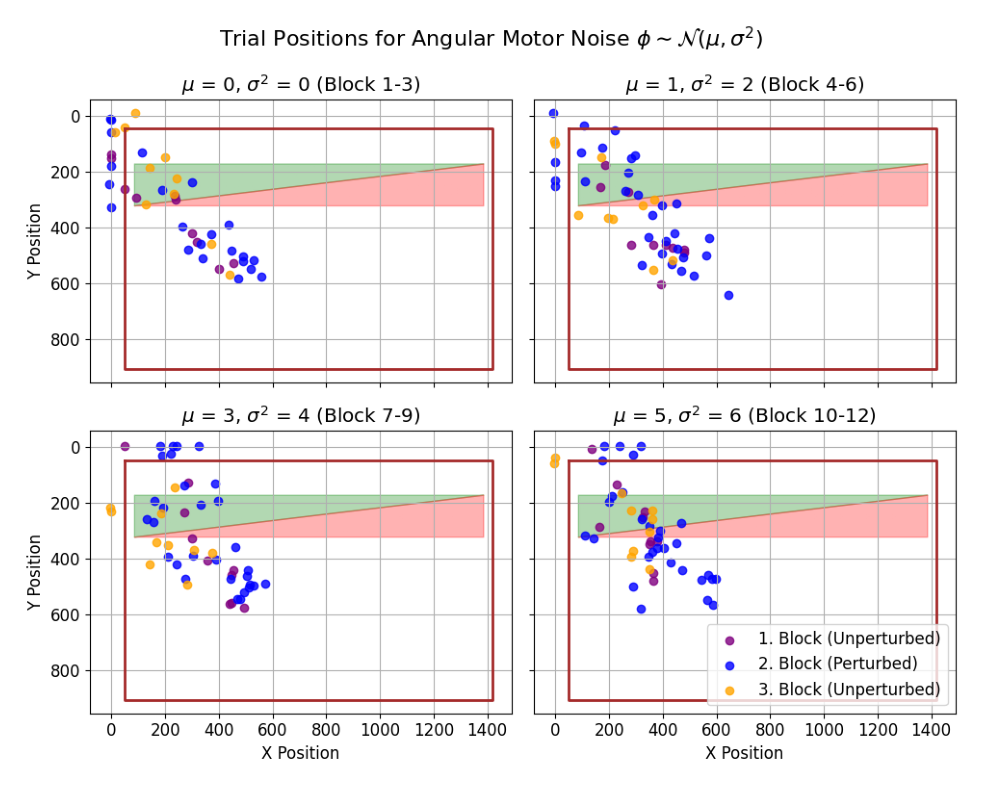

In [1]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(plt.imread(f"forward/Karim/scatter_plot.png"))
plt.axis("off")
plt.tight_layout()
plt.show()

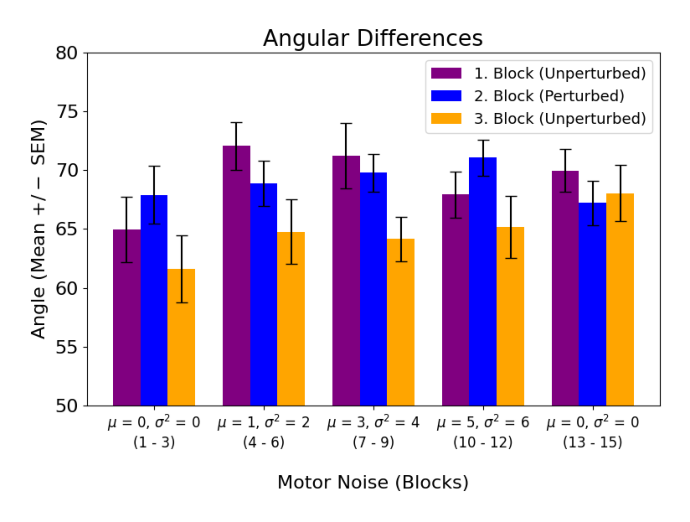

In [7]:
plt.figure(figsize=(7, 7))
plt.imshow(plt.imread(f"forward/Karim/angle_plot.png"))
plt.axis("off")
plt.tight_layout()
plt.show()

To visualise and analyse the effect of motor noise we plot the mean and SEM angle of throws in each trial block. We observe a general trend of increase in the blue and orange bars as increase in the motor noise. In the purple bars, there is no general trend, possibly because the subject was surprised with a change in motor noise and a decrease in friction.

We observe in the block with motor noise removed, in the perturbed trials (blue bar), the subject adapted apropriately to have a lesser angle of throw to counteract the sudden perturbation towards right as compared to no apparent adaptation in the previous noisy trial block.

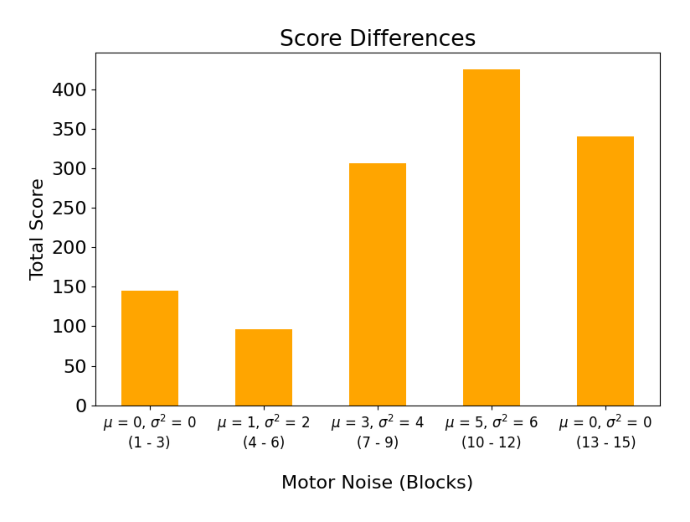

In [8]:
plt.figure(figsize=(7, 7))
plt.imshow(plt.imread(f"forward/Karim/score_plot.png"))
plt.axis("off")
plt.tight_layout()
plt.show()

The above plot shows the scores earned in each trial blocks. It seems the effect of learning across blocks was stronger than the effect of motor noise, thus we see a general trend of improvement in subject's performance on the task. Since there is decrease in friction across blocks, this might make learning easier since the subjects don't have to throw the pint as agressively as before to make it reach the goal but can have more control over its trajectory.

There is a dip in performance when the first motor noise in block 4 is introduced, but the subject is able to consistently improve their performance after each subsequent increase in motor noise. 

Another dip in performance is observed after motor noise is removed in block 13, which is an interesting after-effect where the subject seems to had fit their behaviour to the large motor noises and thus performs poorer without any motor noise.

### Task 3: Discussion of our results

Is feedback still helpful even if motor noise is present? 
    Our results suggest that feedback remains useful even in the presence of motor noise, though its effectiveness depends on the noise level. In blocks with motor noises, the subject was able to adapt their motor commands over time, as seen in the gradual improvement in performance despite the perturbations. The ‘endpos’ feedback helped the subject adjust their throwing angles to counteract the effects of noise. 

How large can the motor noise be until learning no longer takes place?
    With an initial surprise to introduced motor noise, the subject is still able to learn successfully even with increasing motor noise. It could be possible that our chosen largest noise of $\mu = 5$ and $\sigma^2 = 6$ was not large enough to inhibit learning. But, in principle, we would expect there to be a threshold for motor noise where the subject couldn't distinguish variability due to lack of skill from external noise influences, such that learning wouldn't be possible anymore.

### Task 4: After-Effect of Motor Noise Removal

In Task 4, we introduced a final block without motor noise to observe after-effects. Subject who had adapted to high motor noise initially performed worse when noise was removed. Their throws appeared to overcompensate, resulting in deviations from the target. Over subsequent trials, performance gradually improved, but overall performance was still worse than the noisy trial block. 

This suggests that prior exposure to noise influenced movement patterns even after its removal. The observed after-effect indicates that the subject adjusted their motor output based on previous conditions, and this adjustment persisted temporarily before recalibrating to the new, noise-free environment.

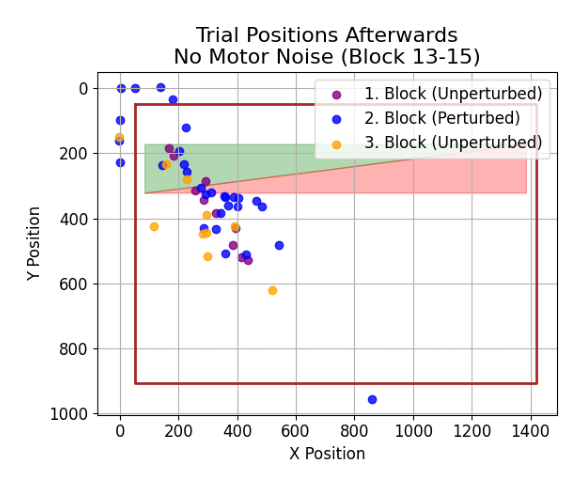

In [4]:
plt.figure(figsize=(6, 5))
plt.imshow(plt.imread(f"forward/Karim/scatter_plot_2.png"))
plt.axis("off")
plt.tight_layout()
plt.show()